## Climate data Assignment
Make a 12-panel plot of the climatology (1 panel for each month) of your data. If your data is not at a time frequency that allows monthly climatology, either choose individual times or a different aggregation (seasonal? year?). Make the plot look publication quality with titles, units, labels, good colorbar, continents, etc.
To submit your assignment:
•Create a repository on github.com for your assignment
•Upload your Jupyter Notebook
•Create 1 issue
•Describe one way you would improve your figure. There is always something to improve, so think critically about  what you could do to make it more clear, nicer, better suited to a particular medium, etc
Send an email to me with a link to your repository.

In [1]:
#Import
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cart
import cartopy.io.img_tiles as cimgt
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import calendar

In [2]:
path = '/scratch/dveronez/dveronez/diana_assignment/'
file = 'sst.mnmean.nc'

In [3]:
ds = xr.open_dataset(path+'/'+file)
ds

<xarray.Dataset> Size: 120MB
Dimensions:    (lat: 180, lon: 360, time: 461, nbnds: 2)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2020-04-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 119MB ...
    time_bnds  (time, nbnds) datetime64[ns] 7kB ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [4]:
ds_monthly = ds.resample(time='M').mean()
ds_month = ds.groupby('time.month').mean()
ds_month

/home/dveronez/miniforge/envs/climate/lib/python3.12/site-packages/xarray/groupers.py:403: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


<xarray.Dataset> Size: 3MB
Dimensions:  (month: 12, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 720B 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lat, lon) float32 3MB -1.79 -1.79 -1.79 ... -1.79 -1.79
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [ ]:
# Convert the temperature from Kelvin to Celsius
#ds_month_celsius = ds_month - 273.15
#ds_month_celsius.attrs['units'] = '°C'
#ds_month_celsius

In [ ]:
#max_temp = ds_month_celsius['sst'].max()
#print(max_temp)

In [5]:
max_temp = ds_month['sst'].max()
print(max_temp)

<xarray.DataArray 'sst' ()> Size: 4B
np.float32(33.78816)


In [ ]:
#min_temp = ds_month_celsius['sst'].min()
#print(min_temp)

In [6]:
min_temp = ds_month['sst'].min()
print(min_temp)

<xarray.DataArray 'sst' ()> Size: 4B
np.float32(-1.7900007)


Text(0.5, 0.98, 'Sea Surface Temperature around Arlington, VA')

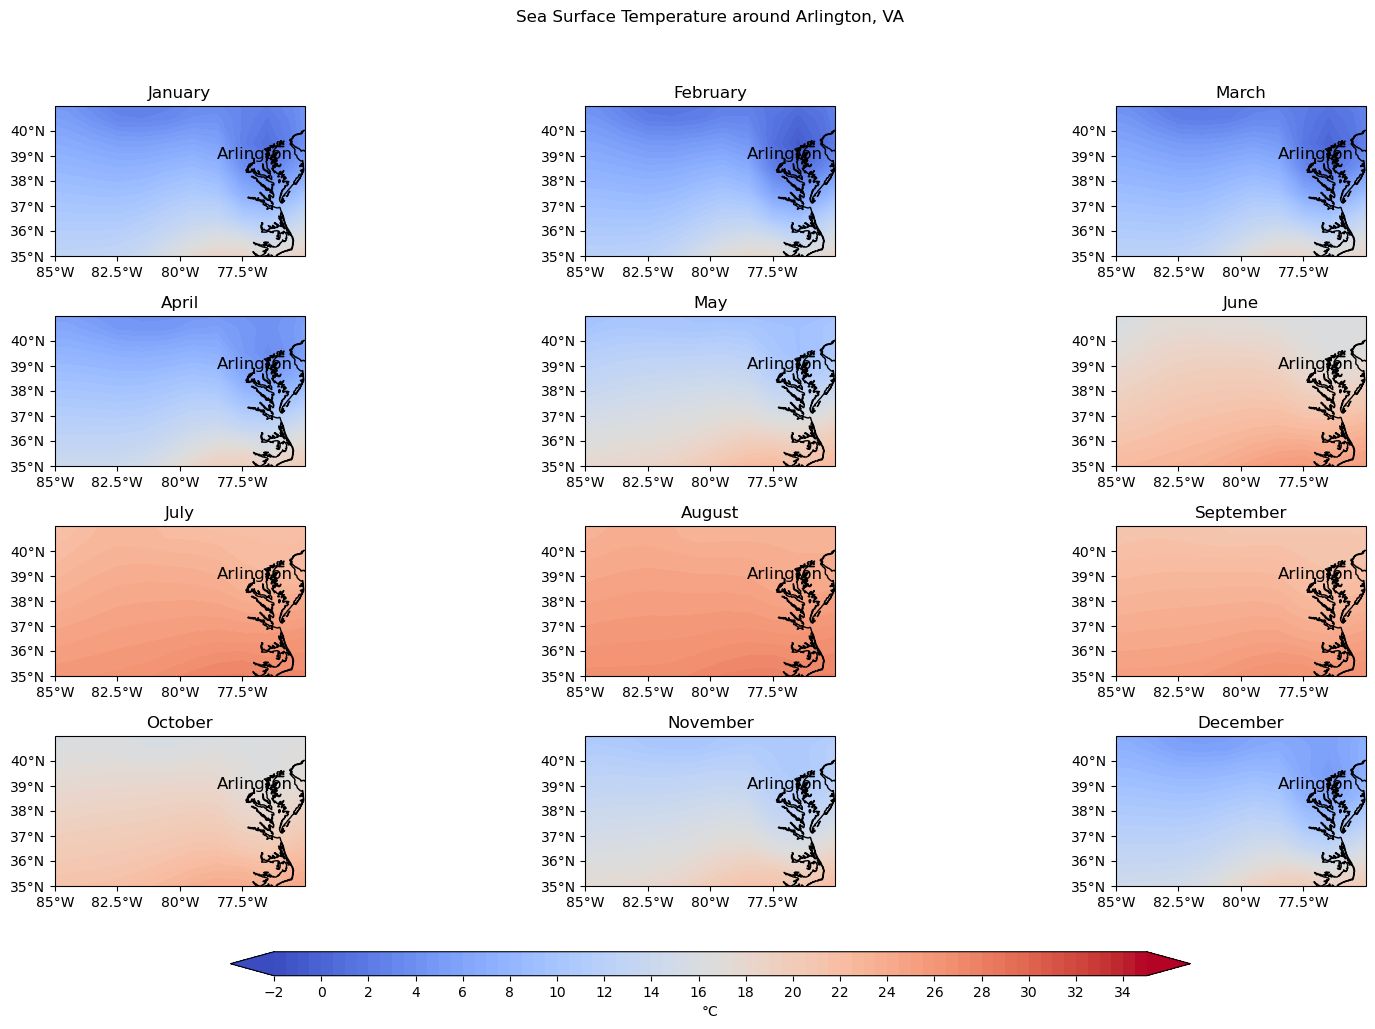

In [8]:
# Define the figure and each axis for the 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(16, 12))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs = axs.flatten()

# Adjust contour levels based on actual data range (assuming -2°C to 35°C)
clevs = np.arange(-2, 35.1, 0.5)  # Adjusted levels

# Loop over all of the months and plot
for i, month in enumerate(ds_month['month']):

    # Select the month
    data = ds_month['sst'].sel(month=month)

    # Add the cyclic point
    data, lons = add_cyclic_point(data, coord=ds_month['lon'])

    # Contour plot with adjusted temperature range
    cs = axs[i].contourf(lons, ds_month['lat'], data, clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='coolwarm', extend='both')

    # Longitude labels for the Arlington region
    axs[i].set_xticks(np.arange(-85, -75, 2.5), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels for the Arlington region
    axs[i].set_yticks(np.arange(35, 41, 1), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the month
    month_name = calendar.month_name[month.values]
    axs[i].set_title(month_name)

    # Draw the coastlines for each subplot
    axs[i].coastlines()

    # Set the extent to focus on Arlington, VA region (includes Washington, D.C.)
    axs[i].set_extent([-85, -75, 35, 41], crs=ccrs.PlateCarree())

    # Add label "Arlington"
    axs[i].text(-77, 38.9, 'Arlington', horizontalalignment='center',
                transform=ccrs.PlateCarree(), fontsize=12, color='black')

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.4, hspace=0.4)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Add a colorbar with adjusted temperature ticks
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal',
                    label='\u00b0C', ticks=np.arange(-2, 36, 2))  # Adjusted range

# Add a big title at the top
plt.suptitle('Sea Surface Temperature around Arlington, VA')